# Introduction to Neural Networks and Deep Learning | Project 1

In [81]:
  
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART 1

## Context: 
A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

## Data Description:
The data set contains information on various signal tests performed:
- <b>Parameters:</b> Various measurable signal parameters.
- <b>Signal_Quality:</b> Final signal strength or quality

## Project Objective:
The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].

## Import Libraries

In [334]:
#%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.pipeline import Pipeline
print(tf.__version__)
import warnings
warnings.filterwarnings("ignore")

2.4.1


In [335]:
np.random.seed(1)

In [336]:
# Read the data from .csv and store into dataframe
dfsignals = pd.read_csv("Signal.csv")
dfsignals.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [337]:
# Find the number of rows and columns
dfsignals.shape

(1599, 12)

<b>Observation:</b>
- There are 1599 rows and 12 attributes in dataset. 

In [338]:
dfsignals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<b>Observation:</b>
- There is no missing values in dataset
- Data type for Signal_Strength is Int64 and rest of the attrobutes are float64.

## Remove Duplicates

In [339]:
# Find the number of duplicated rows
dfsignals.duplicated().sum()

240

<b>Observation:</b>
- There are 240 duplicated rows in dataset

In [340]:
# Remove the duplicates
dfsignals.drop_duplicates(keep='first',inplace=True)

In [341]:
# Checking any duplicated rows
dfsignals[dfsignals.duplicated()]

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

## Univariate Analysis

In [342]:
## Five points summary
dfsignals.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

<b>Observation:</b>
- There is no negative values found.
- Parameter 6 and Parameter 7 are right skewed. 
- Minimum of Signal_Strength is 3 and Maximum of Signal_Strength is 8

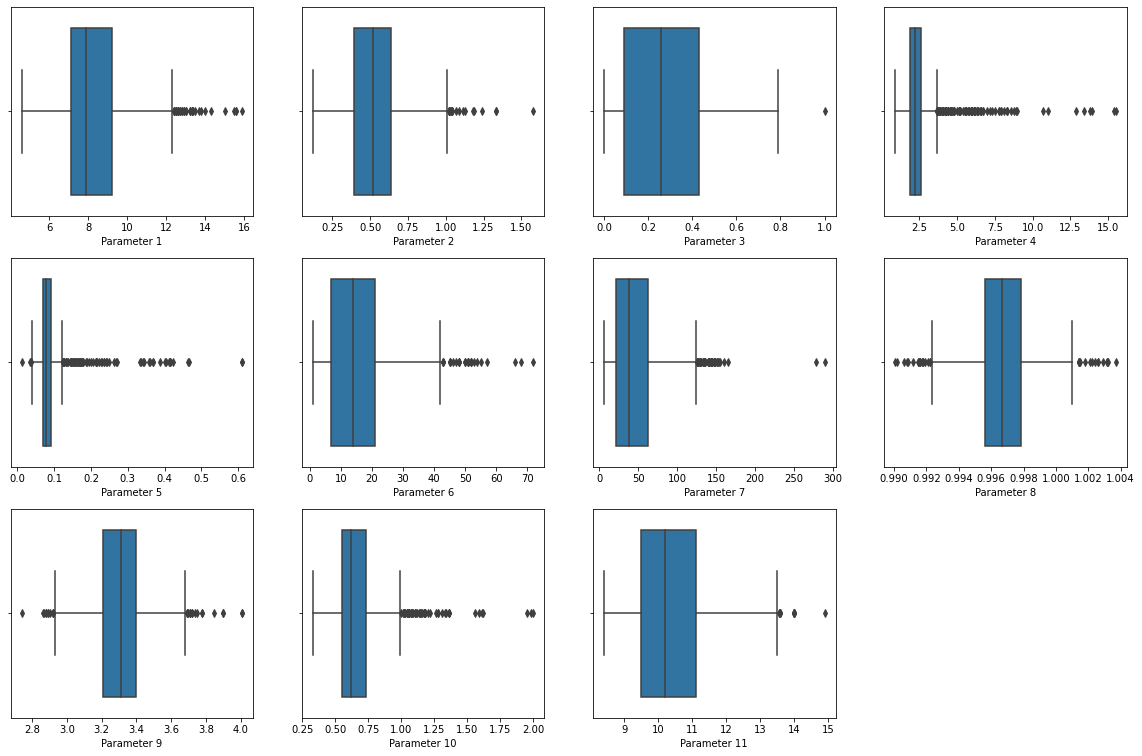

In [343]:
# Plot the Boxplot for each attribute.

col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(dfsignals[col], orient="h", dodge=False, whis=1.5)
 

<b>Observation:</b>
- There are outliers in all the Parameters. 

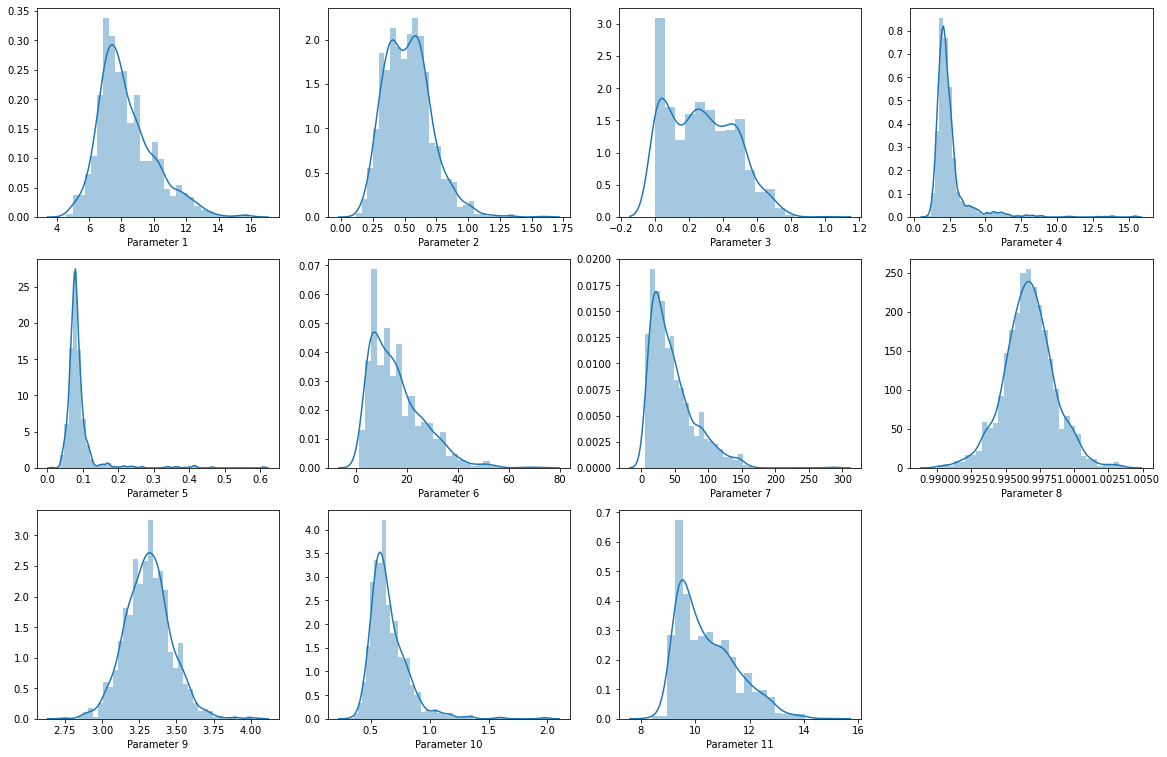

In [344]:
# Plot the Boxplot for each attribute.

col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.distplot(dfsignals[col])
    

<b>Observation:</b>
- Parameter 8 and Parameter 9 normally distributed and rest of the Parameters are right skewed.

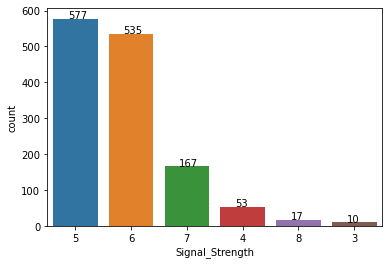

In [345]:
# Plotting countplot for Signal Strength
ax = sns.countplot(dfsignals["Signal_Strength"], 
                   order = dfsignals["Signal_Strength"].value_counts().index)

for p, label in zip(ax.patches, dfsignals["Signal_Strength"].value_counts()):
    ax.annotate(label, (p.get_x()+0.265, p.get_height()+0.25))

<b>Observation:</b>
- More than 577 signals are having strength is 5.
- 535 signals strength is 6.
- Only 10 signal is having less strength 3. 

## Bivariate Analysis

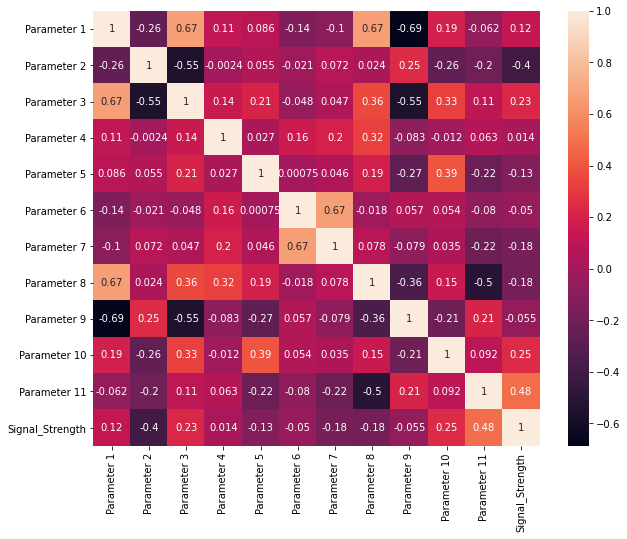

In [346]:
# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dfsignals.corr(), annot=True)

<b>Observation:</b>
- Parameter 1 is having strong correlation with Parameter 8 and Parameter 3. 
- Parameter 6 is having strong correlation with Parameter 7.
- Parameter 1 is having negative correlation with Parameter 9. 

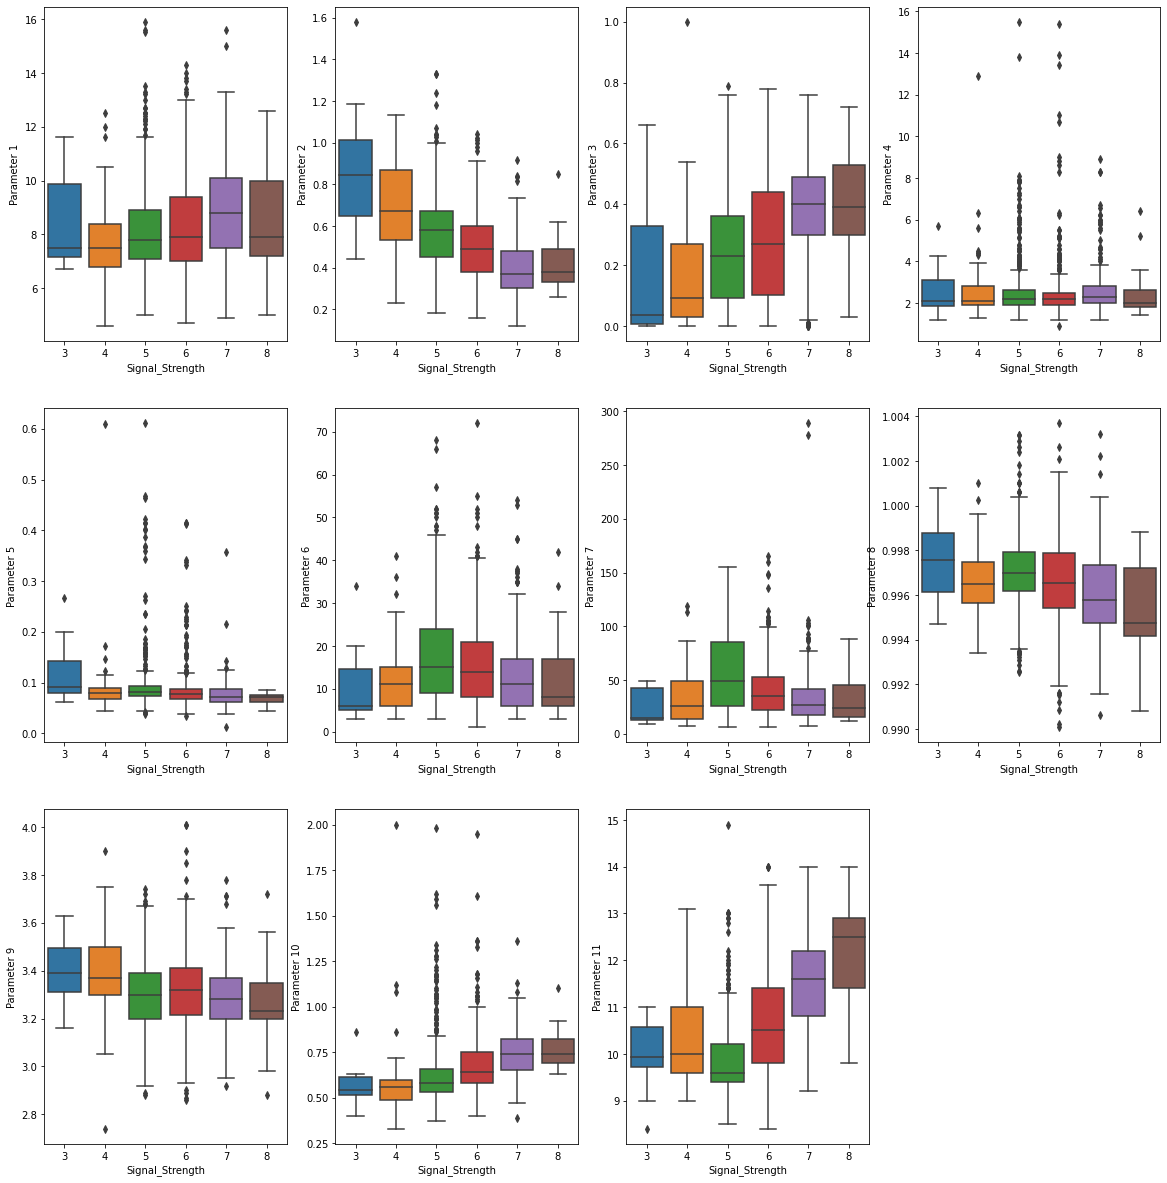

In [347]:
# Plot the graph for each parameters against Signal_Strength
col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,80))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(x='Signal_Strength',y=col,data=dfsignals)
  

<b>Observation:</b>
- Above graph shows that Parameter 2 value increases, Signal_strength decreses. 
- Parameter 3 value increases, Signal_Strength also increases. 
- Parameter 4 and Parameter 5 do not casue any change in Signal_Strength.
- Parameter 10 value increases, Signal_Strength also increases.


## Multivariate Analysis

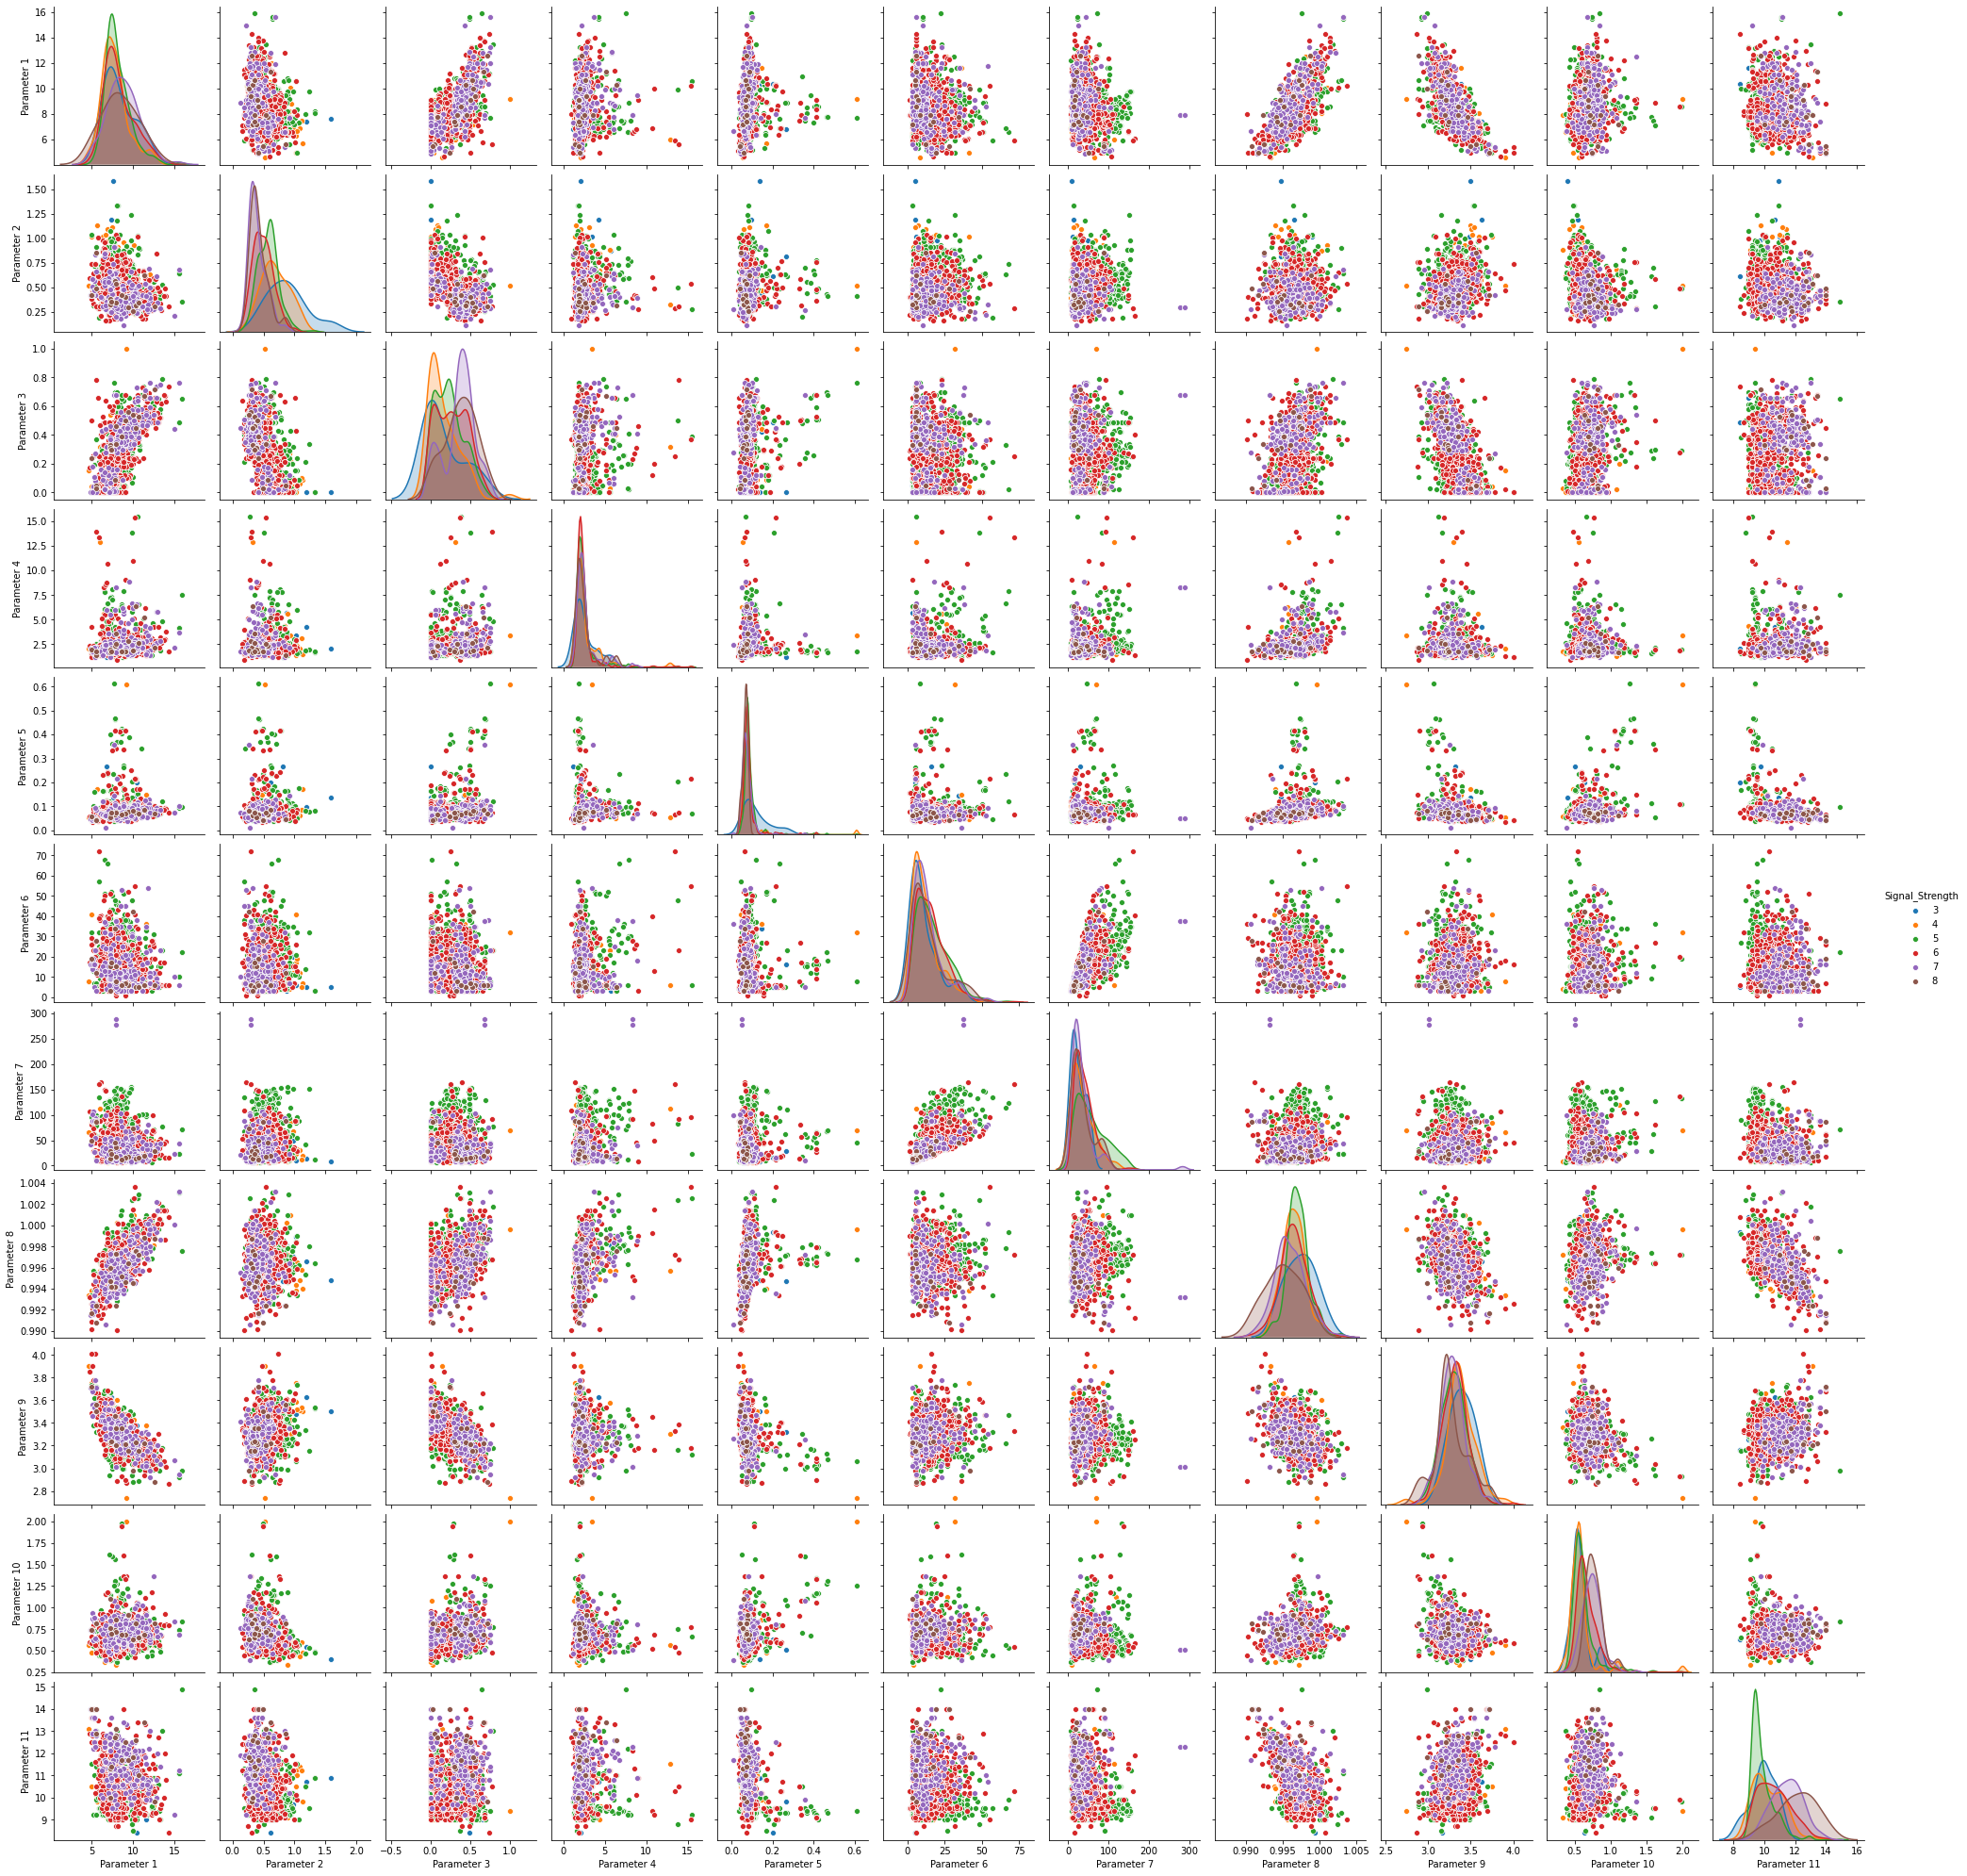

In [348]:
sns.pairplot(dfsignals, hue="Signal_Strength")

<b>Observation:</b>
- Parameter 1 is having positive correlation with Parameter 8.
- Parameter 1 is having negative correlation with Parameter 9. 
- Correlation matrix also confirms the same. 

## Handling Outliers

In [349]:
# Handle the outlier using IQR

collst = np.array(dfsignals.columns[0:11])

for col in collst:
    q1 = np.percentile(dfsignals[col], 25) #Find the Q1
    q3 = np.percentile(dfsignals[col], 75) #Find the Q2 
    
    # Find the IQR
    iqr = q3 - q1 
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    lowerlimit = q1 - 1.5 * iqr  #Find the lower boundary
    upperlimit = q3 + 1.5 * iqr  #Find the Upper boundary

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfsignals[col] = np.where(dfsignals[col] > upperlimit, upperlimit, dfsignals[col]) #Update the upper boundary value
    dfsignals[col] = np.where(dfsignals[col] < lowerlimit, lowerlimit, dfsignals[col]) #Uppdate the lower boundary value

Q1 of Parameter 1 : 7.1
Q3 of Parameter 1 : 9.2
IQR of Parameter 1 : 2.0999999999999996
Lowerlimit of Parameter 1 : 3.95
Uppperlimit of Parameter 1 : 12.349999999999998
Q1 of Parameter 2 : 0.39
Q3 of Parameter 2 : 0.64
IQR of Parameter 2 : 0.25
Lowerlimit of Parameter 2 : 0.015000000000000013
Uppperlimit of Parameter 2 : 1.0150000000000001
Q1 of Parameter 3 : 0.09
Q3 of Parameter 3 : 0.43
IQR of Parameter 3 : 0.33999999999999997
Lowerlimit of Parameter 3 : -0.42000000000000004
Uppperlimit of Parameter 3 : 0.94
Q1 of Parameter 4 : 1.9
Q3 of Parameter 4 : 2.6
IQR of Parameter 4 : 0.7000000000000002
Lowerlimit of Parameter 4 : 0.8499999999999996
Uppperlimit of Parameter 4 : 3.6500000000000004
Q1 of Parameter 5 : 0.07
Q3 of Parameter 5 : 0.091
IQR of Parameter 5 : 0.02099999999999999
Lowerlimit of Parameter 5 : 0.03850000000000002
Uppperlimit of Parameter 5 : 0.12249999999999998
Q1 of Parameter 6 : 7.0
Q3 of Parameter 6 : 21.0
IQR of Parameter 6 : 14.0
Lowerlimit of Parameter 6 : -14.0
Upp

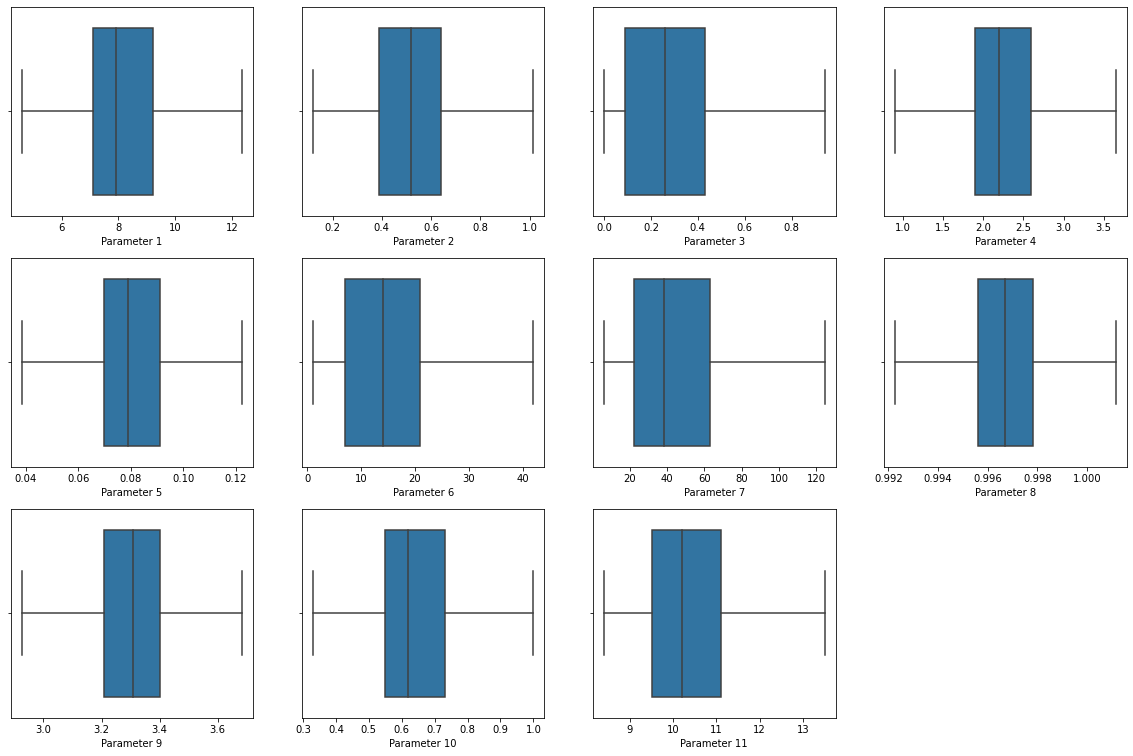

In [350]:
# Confirm that outliers are removed
col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(dfsignals[col], orient="h", dodge=False, whis=1.5)

## Build the Model

In [351]:
# Set the random state
tf.random.set_seed(1)

In [352]:
# Split independed and depended variable
X = dfsignals.drop('Signal_Strength', axis=1)
y = dfsignals['Signal_Strength']

In [353]:
# Changing the data type from float64 to float32 since GPU does not support float64 
X = X.astype('float32')
y = y.astype('float32')

In [354]:
# Split the training set test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [355]:
# Apply scalling 
normal = MinMaxScaler()
scaledXtrain = normal.fit_transform(X_train)
scaledXtest = normal.transform(X_test)

In [356]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(6, input_dim=11, kernel_initializer='he_normal', activation='relu'))
# Add output layer with linear activation function as it is regression problem
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_906"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2700 (Dense)           (None, 6)                 72        
_________________________________________________________________
dense_2701 (Dense)           (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


<b>Observation:</b>
- Formula: output_size * (input_size + 1) == number_parameters 
- In first layer, 6 output * (11 inputs + 1) = 72 Param
- In second layer, 1 output * (6 inputs +1 ) = 7 param

In [357]:
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer=keras.optimizers.Adam(),  loss='mse', metrics=['mse'])

In [358]:
# Train the model
history = model.fit(scaledXtrain, y_train,
          validation_data=(scaledXtest, y_test), 
          epochs=100,
          batch_size = 32
         )

Epoch 1/100
32/32 [==============================] - 1s 17ms/step - loss: 34.5575 - mse: 34.5575 - val_loss: 32.3267 - val_mse: 32.3267
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 31.6508 - mse: 31.6508 - val_loss: 29.7041 - val_mse: 29.7041
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 29.8777 - mse: 29.8777 - val_loss: 27.0295 - val_mse: 27.0295
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 26.6828 - mse: 26.6828 - val_loss: 24.1522 - val_mse: 24.1522
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 23.8580 - mse: 23.8580 - val_loss: 21.1182 - val_mse: 21.1182
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 20.4656 - mse: 20.4656 - val_loss: 18.0289 - val_mse: 18.0289
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 17.6677 - mse: 17.6677 - val_loss: 14.9795 - val_mse: 14.9795
Epoch 8/100
32/32 [==============================] - 0

Epoch 63/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6733 - mse: 0.6733 - val_loss: 0.6502 - val_mse: 0.6502
Epoch 64/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6574 - mse: 0.6574 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 65/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6160 - mse: 0.6160 - val_loss: 0.6376 - val_mse: 0.6376
Epoch 66/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 0.6292 - val_mse: 0.6292
Epoch 67/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6795 - mse: 0.6795 - val_loss: 0.6237 - val_mse: 0.6237
Epoch 68/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6554 - mse: 0.6554 - val_loss: 0.6184 - val_mse: 0.6184
Epoch 69/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6615 - mse: 0.6615 - val_loss: 0.6125 - val_mse: 0.6125
Epoch 70/100
32/32 [==============================] - 0s 5ms/step - loss: 0.

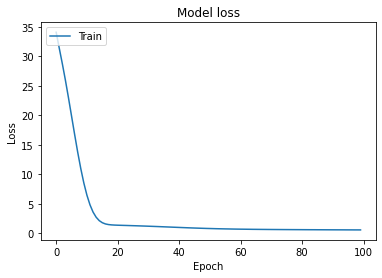

In [359]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [360]:
prediction = model.predict(scaledXtest)

In [361]:
train_error =  np.abs(y_test.to_numpy() - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [362]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.6405379
mean_error:  0.82998794
min_error:  0.002257824
max_error:  4.689654


<b>Observation:</b>
- Loss value is more than 34 in first epoch and drastically  reduced to 0.48 in 100 epoch by updating weights in backpropagation. 
- The mean error is 0.82

## Model Optimization

In [363]:
# Define the function
def create_model(layers, activation):
    model = tf.keras.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(tf.keras.layers.Dense(nodes,input_dim=scaledXtrain.shape[1], kernel_initializer='he_normal'))
            model.add(tf.keras.layers.Activation(activation))
           
        else:
            model.add(tf.keras.layers.Dense(nodes,  kernel_initializer='he_normal'))
            model.add(tf.keras.layers.Activation(activation))
    model.add(tf.keras.layers.Dense(1, activation='linear')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
    return model
    
model = KerasRegressor(build_fn=create_model, verbose=0)

In [364]:
## Layers
# (6,) - One hidden layer with 6 neurons. 
# (9,6) - Two hidden layers. 9 neurons in first layer, 6 neurons in second layer
# (12,9,6) - Three hidden layers - 12 neurons in first layer, 9 neurons in second layer, 6 neurons in third layer
layers = [(6,),(9,6),(12,9,6)] 
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [5,20,25,32,40,45,50], epochs=[100])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [365]:
# Train the model using GridSearchCV
grid_result = grid.fit(scaledXtrain, y_train)

In [366]:
# Best parameters
grid.best_params_

{'activation': 'relu', 'batch_size': 5, 'epochs': 100, 'layers': (6,)}

In [367]:
# Apply best parameters 
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(6, input_dim=11, kernel_initializer='he_normal', activation='relu'))
# Add output layer with linear activation function as it is regression problem
model.add(tf.keras.layers.Dense(1, activation='linear'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer=keras.optimizers.Adam(),  loss='mse', metrics=['mse'])

# Train the model
history = model.fit(scaledXtrain, y_train,
          validation_data=(scaledXtest, y_test), 
          epochs=100,
          batch_size = 5
         )

Epoch 1/100
204/204 [==============================] - 1s 4ms/step - loss: 25.4092 - mse: 25.4092 - val_loss: 9.4318 - val_mse: 9.4318
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 5.0525 - mse: 5.0525 - val_loss: 1.0230 - val_mse: 1.0230
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.0746 - mse: 1.0746 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 1.0916 - mse: 1.0916 - val_loss: 0.8856 - val_mse: 0.8856
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.8613 - mse: 0.8613 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.9571 - mse: 0.9571 - val_loss: 0.7803 - val_mse: 0.7803
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.8267 - mse: 0.8267 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 8/100
204/204 [==============================] - 1s 3ms/step 

204/204 [==============================] - 0s 2ms/step - loss: 0.4494 - mse: 0.4494 - val_loss: 0.3919 - val_mse: 0.3919
Epoch 63/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.3945 - val_mse: 0.3945
Epoch 64/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3980 - mse: 0.3980 - val_loss: 0.4005 - val_mse: 0.4005
Epoch 65/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4228 - mse: 0.4228 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 66/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.3957 - val_mse: 0.3957
Epoch 67/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4485 - mse: 0.4485 - val_loss: 0.3954 - val_mse: 0.3954
Epoch 68/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.3921 - val_mse: 0.3921
Epoch 69/100
204/204 [==============================] - 0s 2ms/step - loss:

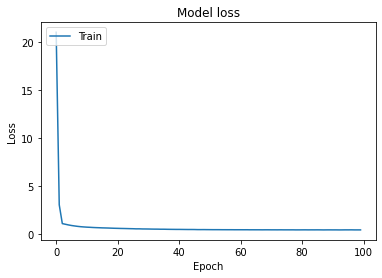

In [368]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [369]:
# Predict the value for test set
prediction = model.predict(scaledXtest)

In [370]:
train_error =  np.abs(y_test.to_numpy() - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [371]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.596116
mean_error:  0.76749885
min_error:  0.0013046265
max_error:  3.976255


<b>Observation:</b>
- Loss value is more than 25 in first epoch and drastically reduced to 0.37 in 100 epoch by updating weights in backpropagation.
- Mean error reduced to 0.76 from 0.82 after turning the model using GridsearchCV. 
- Maximum error also reduced to 3.97 from 4.68 after tunring the model.

## Save the Model

In [372]:
# Save the model in .h5 format for future use
model.save_weights('signal_lr.h5')

In [373]:
# Save the model in .json format for future use
with open('signal_reg.json', 'w') as f:
    f.write(model.to_json())

## PART 2

## Context:
A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

## Data Description:
The data set contains information on various signal tests performed.
- <b>Parameters:</b> Various measurable signal parameters.
- <b>Signal_Quality:</b> Final signal strength or quality.

## Project Objective:
The need is to build a classifier which can use these parameters to determine the signal strength or
quality [as number].

## Import Libraries

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import to_categorical

In [375]:
print(tf.__version__)

2.4.1


In [376]:
np.random.seed(1)

In [377]:
# Read the data from .csv and store into dataframe
dfsignals = pd.read_csv("Signal.csv")
dfsignals.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [378]:
# Find the number of rows and columns
dfsignals.shape

(1599, 12)

<b>Observation:</b>
- There are 1599 rows and 12 attributes in dataset.

In [379]:
dfsignals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<b>Observation:</b>
- There is no missing values in dataset
- Data type for Signal_Strength is Int64 and rest of the attrobutes are float64.

## Remove Duplicates

In [380]:
dfsignals.duplicated().sum()

240

<b>Observation:</b>
- There are 240 duplicated rows in dataset

In [381]:
# Remove duplicates
dfsignals.drop_duplicates(keep='first',inplace=True) 

In [382]:
# Checking any duplicated rows
dfsignals[dfsignals.duplicated()] 

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

## Univariate Analysis

In [383]:
## Five points summary
dfsignals.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

<b>Observation:</b>
- There is no negative values found.
- Parameter 6 and Parameter 7 are right skewed.
- Minimum of Signal_Strength is 3 and Maximum of Signal_Strength is 8

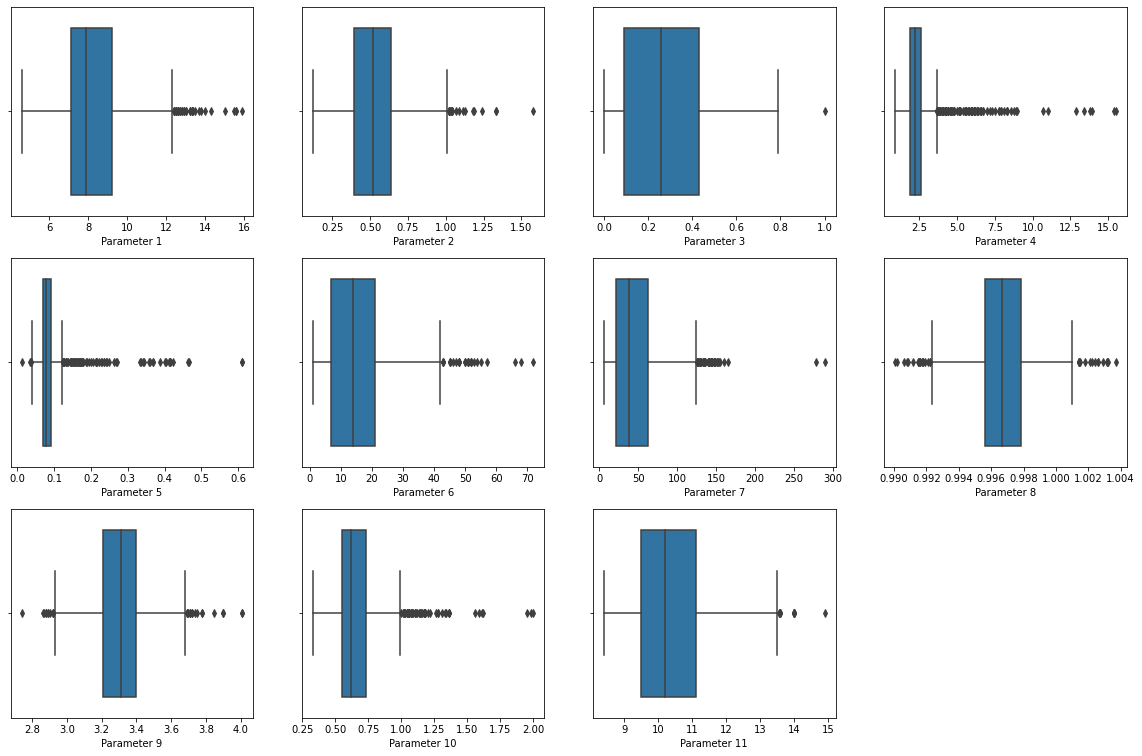

In [384]:
# Plot the Boxplot for each attribute.

col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(dfsignals[col], orient="h", dodge=False, whis=1.5)

<b>Observation:</b>
- There are outliers in all the Parameters

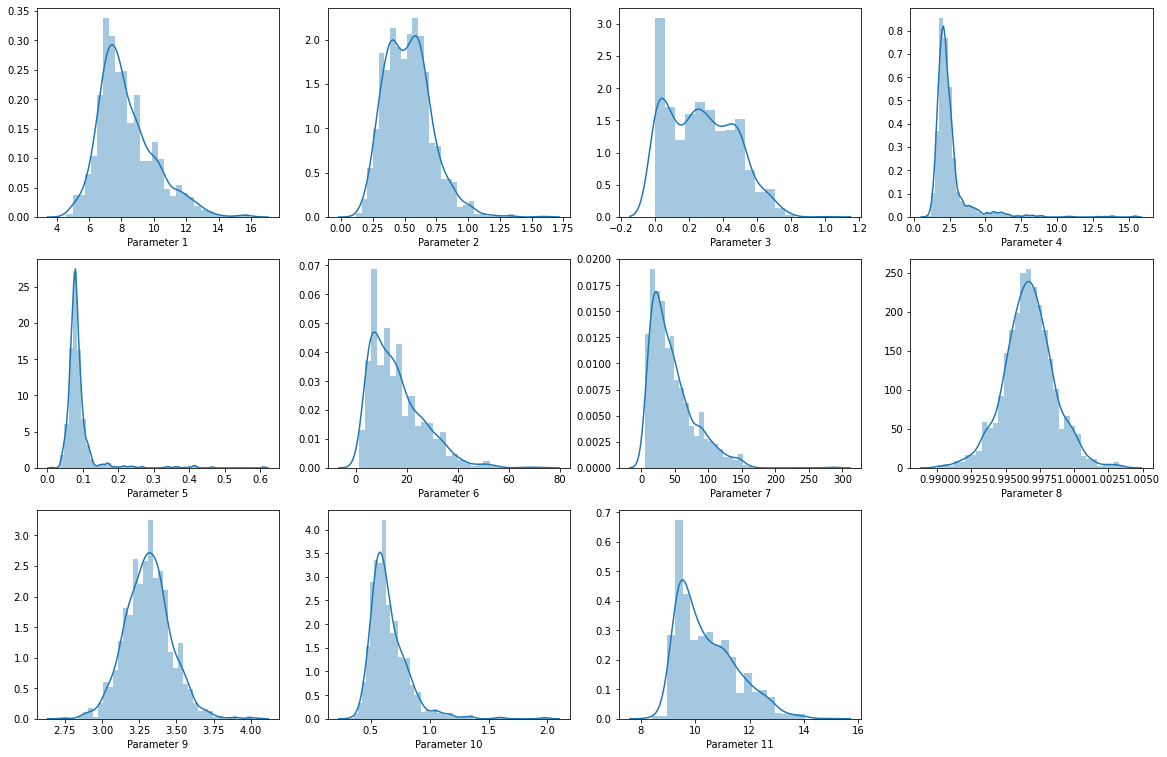

In [385]:
# Plot the Boxplot for each attribute.

col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.distplot(dfsignals[col])

<b>Observation:</b>
- Parameter 8 and Parameter 9 normally distributed and rest of the Parameters are right skewed.

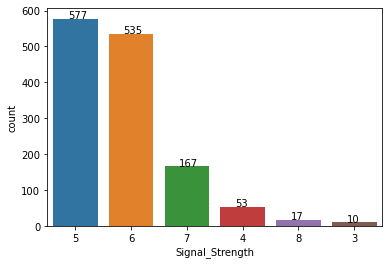

In [386]:
# Plotting countplot for Signal Strength
ax = sns.countplot(dfsignals["Signal_Strength"], 
                   order = dfsignals["Signal_Strength"].value_counts().index)

for p, label in zip(ax.patches, dfsignals["Signal_Strength"].value_counts()):
    ax.annotate(label, (p.get_x()+0.265, p.get_height()+0.25))

<b>Observation:</b>
- More than 577 signals are having strength is 5.
- 535 signals strength is 6.
- Only 10 signal is having less strength 3.

## Bivariate Analysis

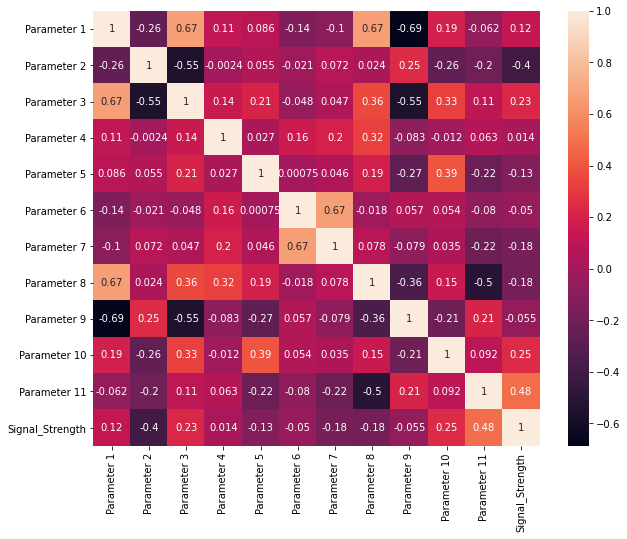

In [387]:
# Plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dfsignals.corr(), annot=True)

<b>Observation:</b>
- Parameter 1 is having strong correlation with Parameter 8 and Parameter 3.
- Parameter 6 is having strong correlation with Parameter 7.
- Parameter 1 is having negative correlation with Parameter 9.

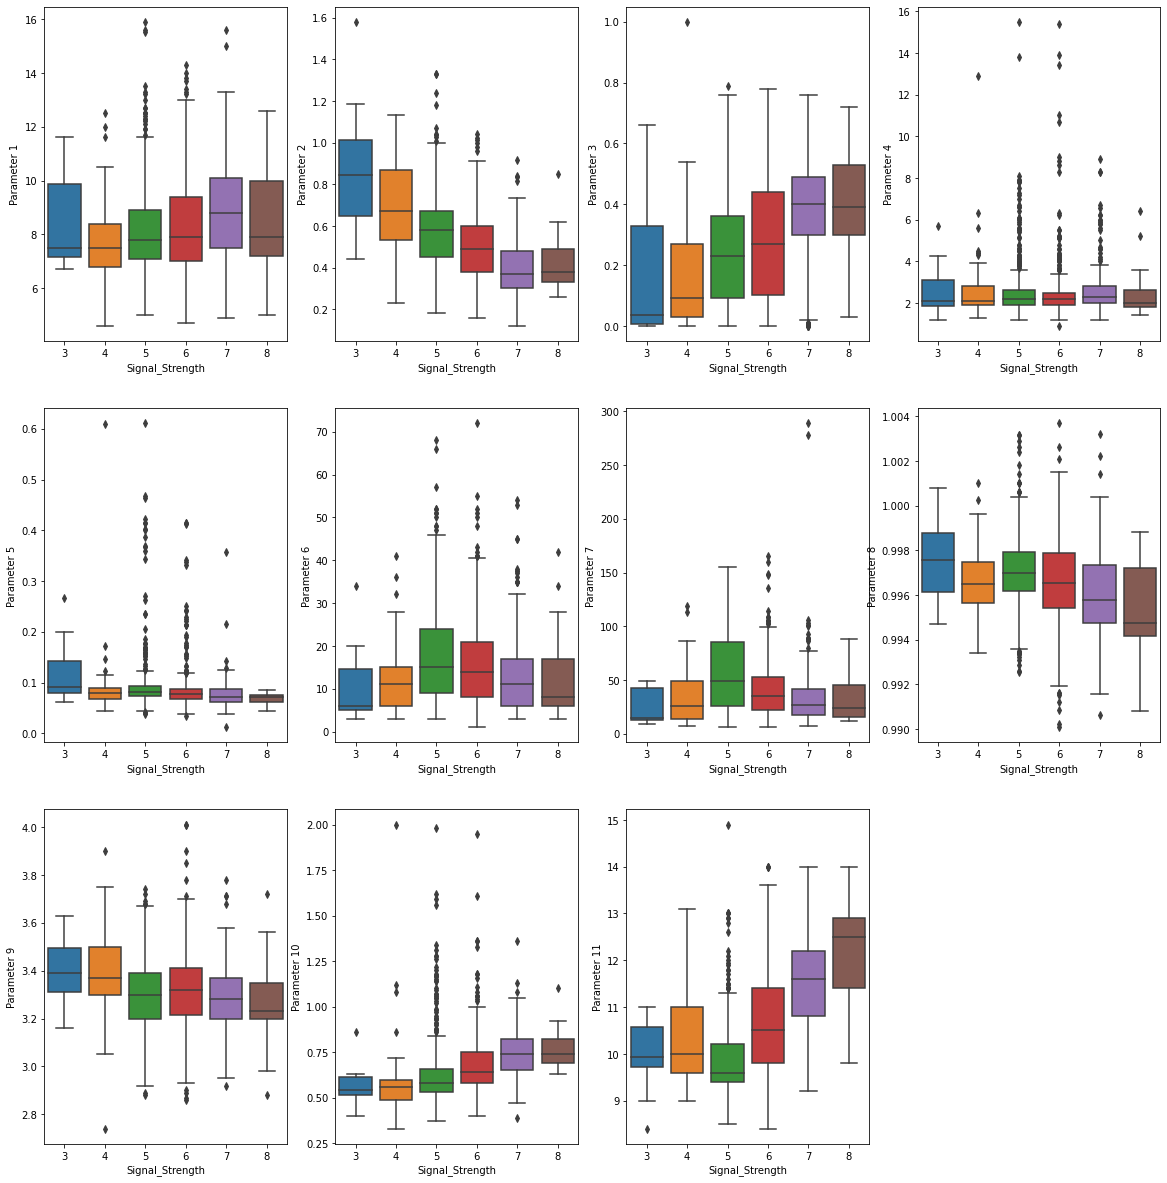

In [388]:
# Plot the graph for each parameters against Signal_Strength
col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,80))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(x='Signal_Strength',y=col,data=dfsignals)

<b>Observation:</b>
- Above graph shows that Parameter 2 value increases, Signal_strength decreses.
- Parameter 3 value increases, Signal_Strength also increases.
- Parameter 4 and Parameter 5 do not casue any change in Signal_Strength.
- Parameter 10 value increases, Signal_Strength also increases.

## Multivariate Analysis

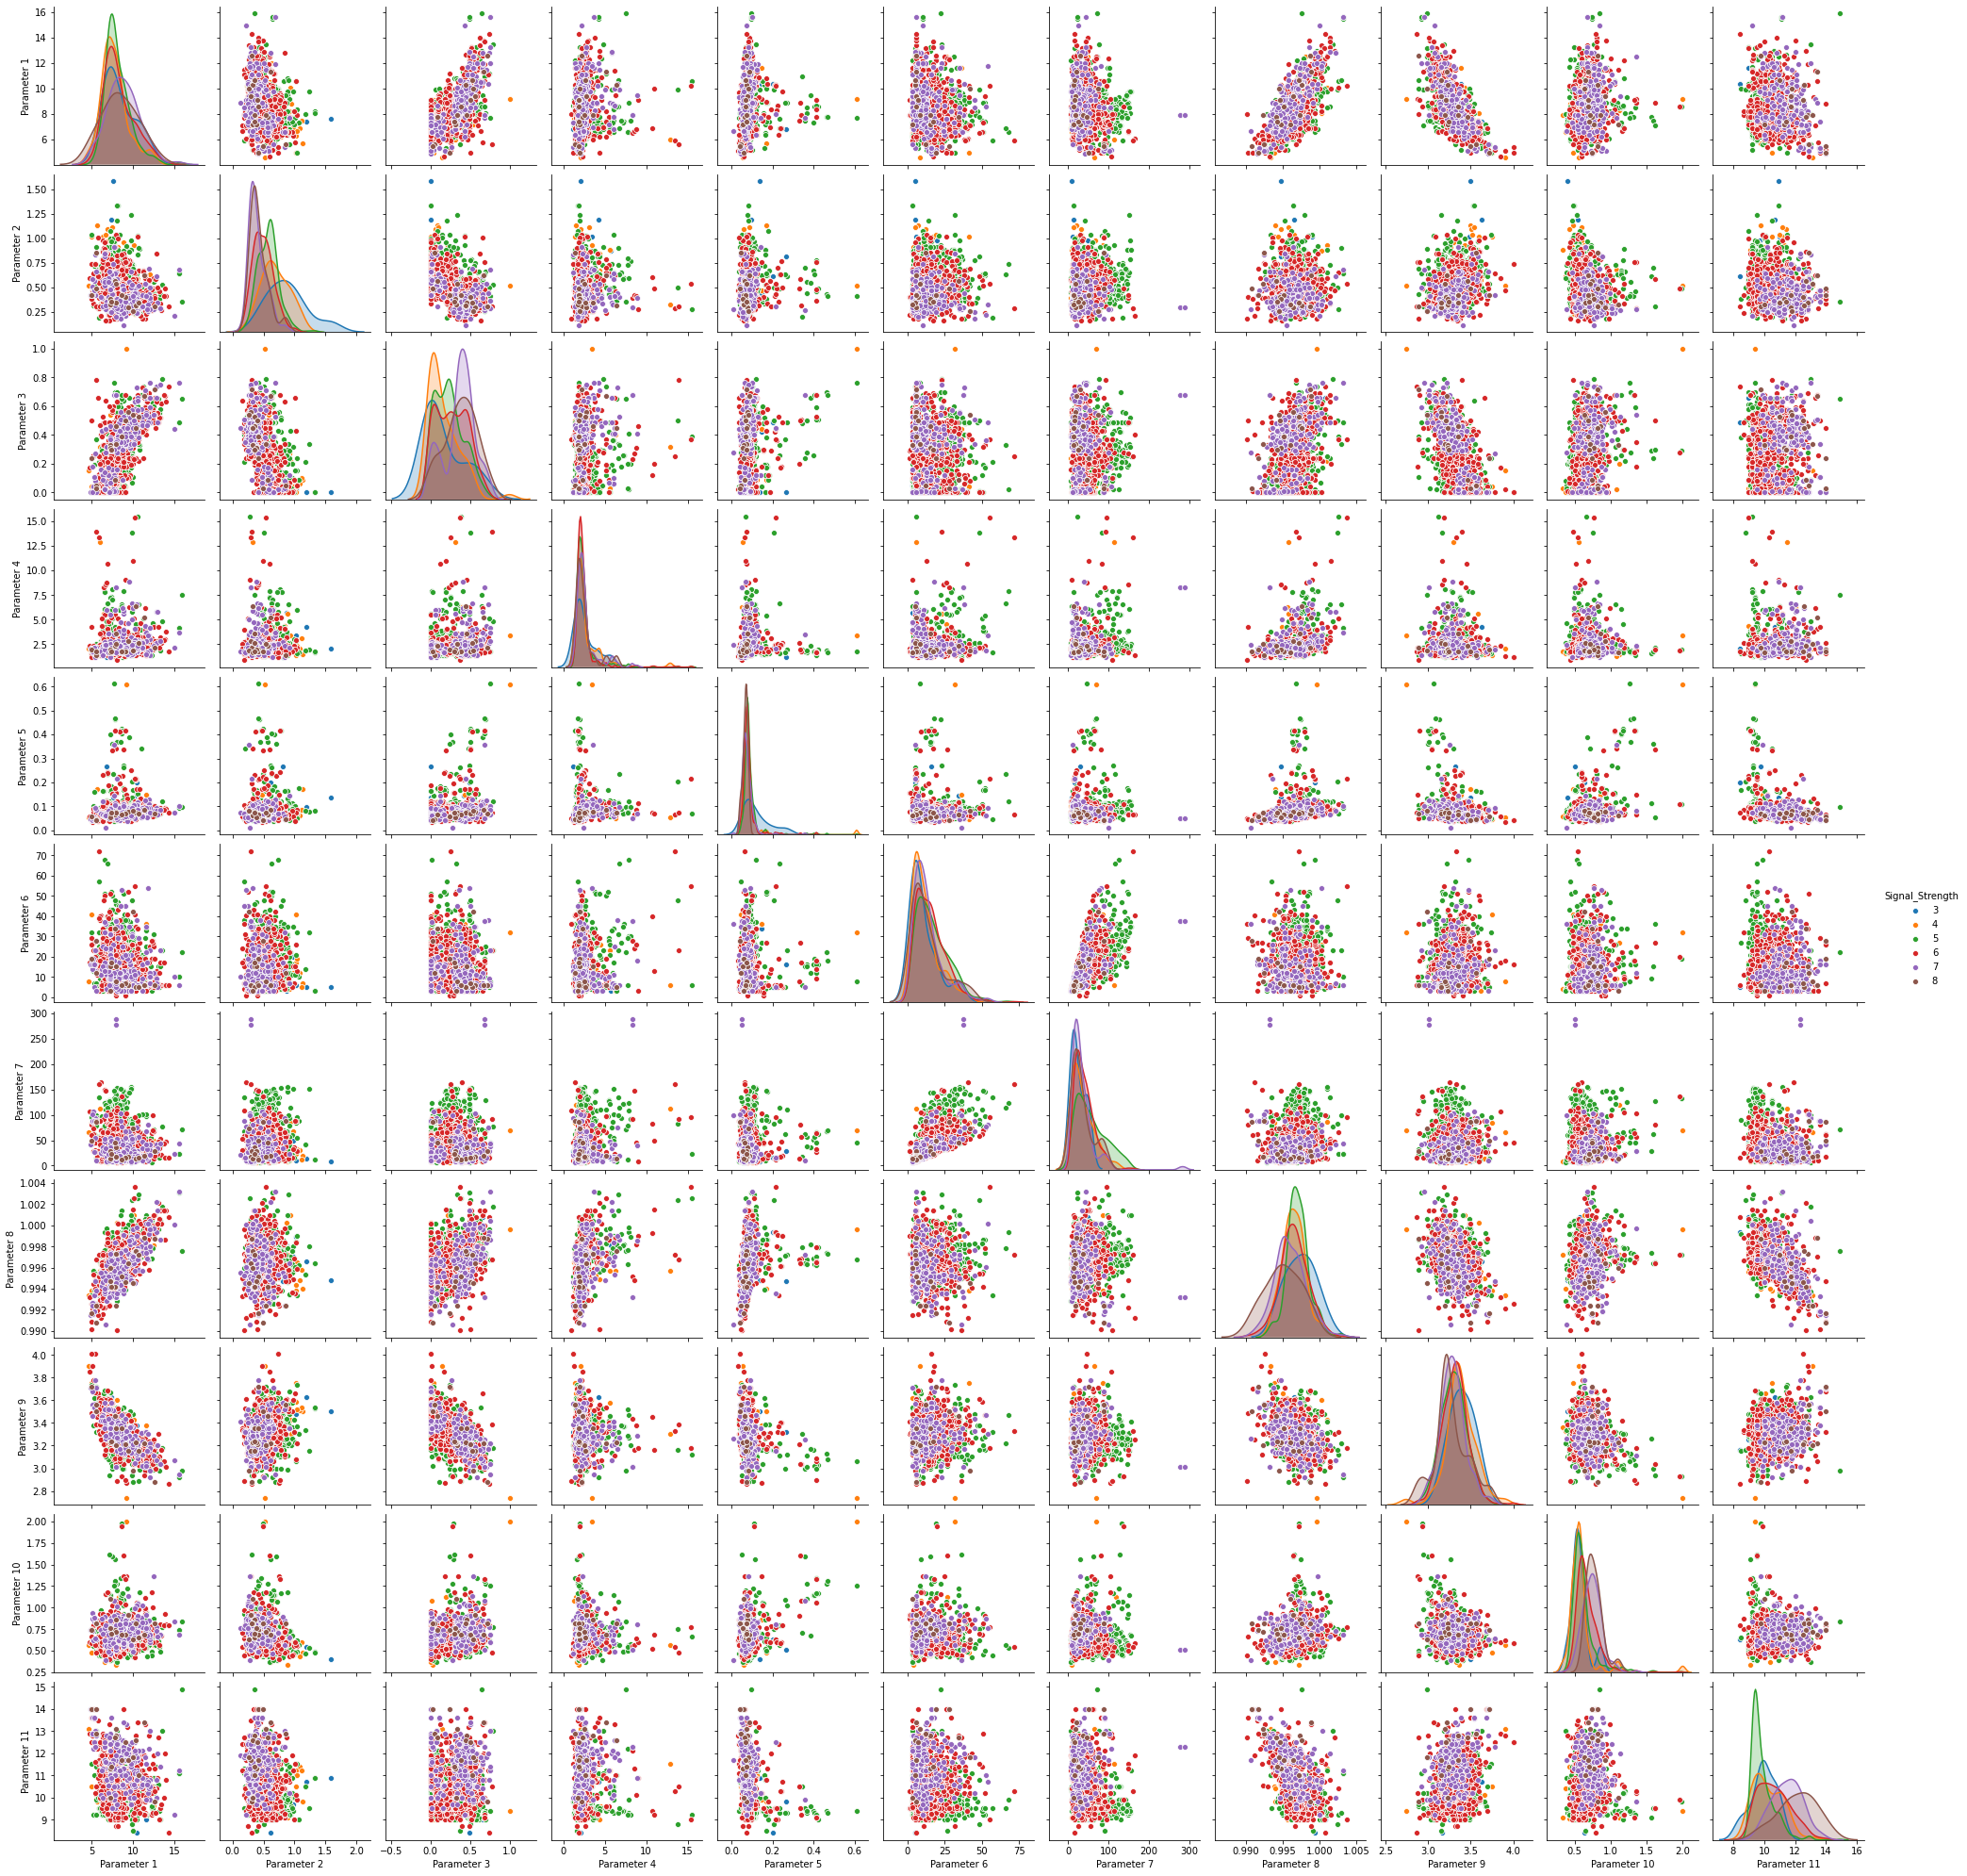

In [389]:
sns.pairplot(dfsignals, hue="Signal_Strength")

<b>Observation:</b>
- Parameter 1 is having positive correlation with Parameter 8.
- Parameter 1 is having negative correlation with Parameter 9.
- Correlation matrix also confirms the same.

## Handling Outliers

In [390]:
# Handle the outlier using IQR

collst = np.array(dfsignals.columns[0:11])

for col in collst:
    q1 = np.percentile(dfsignals[col], 25) #Find the Q1
    q3 = np.percentile(dfsignals[col], 75) #Find the Q2 
    
    # Find the IQR
    iqr = q3 - q1 
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    lowerlimit = q1 - 1.5 * iqr  #Find the lower boundary
    upperlimit = q3 + 1.5 * iqr  #Find the Upper boundary

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfsignals[col] = np.where(dfsignals[col] > upperlimit, upperlimit, dfsignals[col]) #Update the upper boundary value
    dfsignals[col] = np.where(dfsignals[col] < lowerlimit, lowerlimit, dfsignals[col]) #Uppdate the lower boundary value

Q1 of Parameter 1 : 7.1
Q3 of Parameter 1 : 9.2
IQR of Parameter 1 : 2.0999999999999996
Lowerlimit of Parameter 1 : 3.95
Uppperlimit of Parameter 1 : 12.349999999999998
Q1 of Parameter 2 : 0.39
Q3 of Parameter 2 : 0.64
IQR of Parameter 2 : 0.25
Lowerlimit of Parameter 2 : 0.015000000000000013
Uppperlimit of Parameter 2 : 1.0150000000000001
Q1 of Parameter 3 : 0.09
Q3 of Parameter 3 : 0.43
IQR of Parameter 3 : 0.33999999999999997
Lowerlimit of Parameter 3 : -0.42000000000000004
Uppperlimit of Parameter 3 : 0.94
Q1 of Parameter 4 : 1.9
Q3 of Parameter 4 : 2.6
IQR of Parameter 4 : 0.7000000000000002
Lowerlimit of Parameter 4 : 0.8499999999999996
Uppperlimit of Parameter 4 : 3.6500000000000004
Q1 of Parameter 5 : 0.07
Q3 of Parameter 5 : 0.091
IQR of Parameter 5 : 0.02099999999999999
Lowerlimit of Parameter 5 : 0.03850000000000002
Uppperlimit of Parameter 5 : 0.12249999999999998
Q1 of Parameter 6 : 7.0
Q3 of Parameter 6 : 21.0
IQR of Parameter 6 : 14.0
Lowerlimit of Parameter 6 : -14.0
Upp

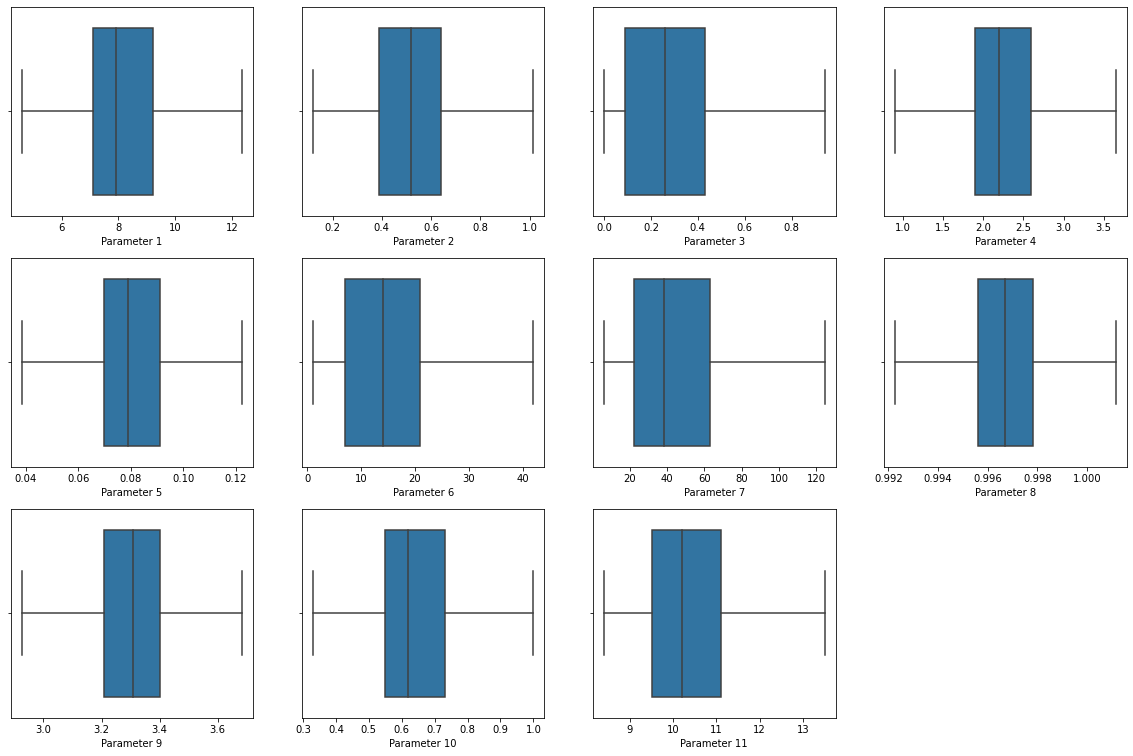

In [391]:
# Confirming that any outliers exists
col = np.array(dfsignals.columns[0:11])

plt.figure(figsize=(20,50))
for i,col in enumerate(col):
    plt.subplot(11,4,i+1)
    sns.boxplot(dfsignals[col], orient="h", dodge=False, whis=1.5)

## Build the Model

In [392]:
# Set the random state
tf.random.set_seed(1)

In [393]:
# Split independed and depended variable
X = dfsignals.drop('Signal_Strength', axis=1)
y = dfsignals['Signal_Strength']

In [394]:
# Convert the data type from float64 to float32 and int64 to int32 as GPU supports only 32 bit
X = X.astype('float32')
y = y.astype('int32')

In [395]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [396]:
# Apply one-hot encoding on categorical variable. Target variable class values range between 3 to 8. 
# Num_classes considered max value of class + 1 as per Keras documentation. Here maximum value is 8, Hence 8+1 = 9
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

In [397]:
# Apply scaling using MinMaxScaler
normal = MinMaxScaler()
X_train = normal.fit_transform(X_train)
X_test = normal.transform(X_test)

In [398]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(11, input_dim=11, activation='relu'))
# Apply the softmax activation function in output layer
model.add(tf.keras.layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1014"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3021 (Dense)           (None, 11)                132       
_________________________________________________________________
dense_3022 (Dense)           (None, 9)                 108       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


<b>Observation:</b>
- Formula: output_size * (input_size + 1) == number_parameters
- In first layer, 11 output * (11 inputs + 1) = 132 Param
- In second layer, 9 output * (11 inputs +1 ) = 108 param

In [399]:
#Comile the model using categorical_crossentroy loss function as it is multiclass classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [400]:
# Train the model
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=100,
          batch_size = 32
         )

Epoch 1/100
32/32 [==============================] - 1s 17ms/step - loss: 2.1836 - accuracy: 0.1843 - val_loss: 2.0496 - val_accuracy: 0.3324
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 2.0020 - accuracy: 0.3493 - val_loss: 1.8622 - val_accuracy: 0.3882
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 1.8130 - accuracy: 0.3936 - val_loss: 1.6794 - val_accuracy: 0.3853
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6454 - accuracy: 0.3917 - val_loss: 1.5311 - val_accuracy: 0.3824
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4912 - accuracy: 0.4090 - val_loss: 1.4202 - val_accuracy: 0.3882
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4024 - accuracy: 0.3898 - val_loss: 1.3381 - val_accuracy: 0.4059
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3118 - accuracy: 0.3938 - val_loss: 1.2773 - val_accuracy: 0.4265
Epoch 8/100


32/32 [==============================] - 0s 4ms/step - loss: 1.0300 - accuracy: 0.5585 - val_loss: 0.9513 - val_accuracy: 0.5971
Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9939 - accuracy: 0.5796 - val_loss: 0.9490 - val_accuracy: 0.6029
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9549 - accuracy: 0.6185 - val_loss: 0.9490 - val_accuracy: 0.5971
Epoch 61/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9883 - accuracy: 0.5978 - val_loss: 0.9477 - val_accuracy: 0.6029
Epoch 62/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9791 - accuracy: 0.5774 - val_loss: 0.9468 - val_accuracy: 0.6029
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9932 - accuracy: 0.5761 - val_loss: 0.9455 - val_accuracy: 0.6029
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9622 - accuracy: 0.5866 - val_loss: 0.9447 - val_accuracy: 0.6029
Epoch 65/100
32/32 

In [401]:
result = model.evaluate(X_test, y_test)
print(result)


11/11 [==============================] - 0s 1ms/step - loss: 0.9230 - accuracy: 0.6147
[0.9229915142059326, 0.6147058606147766]


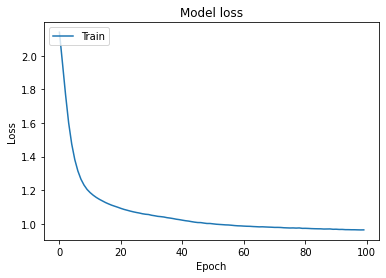

In [402]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<b>Observation:</b>
- Loss value is more than 2 in first epoch and drastically reduced to 0.91 in 100 epoch by updating weights in backpropagation.
- Accuracy is 0.18 in first epoch and it is increased to 0.60 in 100 epoch. 


In [403]:
prediction_clf = model.predict(X_test)
prediction_clf = (prediction_clf > 0.5)
prediction_clf

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [404]:
print(classification_report(y_test, prediction_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.70      0.63      0.66       148
           6       0.61      0.43      0.50       132
           7       0.65      0.27      0.38        41
           8       0.00      0.00      0.00         3

   micro avg       0.66      0.47      0.55       340
   macro avg       0.22      0.15      0.17       340
weighted avg       0.62      0.47      0.53       340
 samples avg       0.47      0.47      0.47       340



<b>Observati668on:</b>
- Signal_Strength 5 is having f1-score 0.66 and recall 0.63. It shows that 63% of prediction is correct for Signal strenth 5. 

## Model Optimization

In [405]:
# Define the function
def create_model_clf(layers, activation):
    model = tf.keras.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(tf.keras.layers.Dense(nodes,input_dim=X_train.shape[1], kernel_initializer='he_normal'))
            model.add(tf.keras.layers.Activation(activation))
           
        else:
            model.add(tf.keras.layers.Dense(nodes,  kernel_initializer='he_normal'))
            model.add(tf.keras.layers.Activation(activation))
    model.add(tf.keras.layers.Dense(9, activation='softmax')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model_clf = KerasClassifier(build_fn=create_model_clf, verbose=0)

In [406]:
## Layers
# (11,) - One hidden layer with 11 neurons. 
# (15,11) - Two hidden layers. 15 neurons in first layer, 11 neurons in second layer
# (20,15,11) - Three hidden layers - 20 neurons in first layer, 15 neurons in second layer, 11 neurons in third layer
layers = [(11,),(15,11),(20,15,11)] 
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [5,10,15,20,25,30,35,40,45,50], epochs=[100])
grid_clf = GridSearchCV(estimator=model_clf, param_grid=param_grid)


In [407]:
# Train the model
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002008F211DF0>,
             param_grid={'activation': ['relu'],
                         'batch_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'epochs': [100],
                         'layers': [(11,), (15, 11), (20, 15, 11)]})

In [408]:
# Get the best parameters
grid_clf.best_params_

{'activation': 'relu', 'batch_size': 40, 'epochs': 100, 'layers': (20, 15, 11)}

In [409]:
# Apply the best parameters
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(20, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dense(9, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=100,
          batch_size = 40
         )


Epoch 1/100
26/26 [==============================] - 1s 19ms/step - loss: 2.1778 - accuracy: 0.1149 - val_loss: 2.0928 - val_accuracy: 0.4353
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 2.0634 - accuracy: 0.4353 - val_loss: 1.9218 - val_accuracy: 0.4353
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1.8710 - accuracy: 0.4067 - val_loss: 1.6413 - val_accuracy: 0.4353
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 1.6058 - accuracy: 0.4025 - val_loss: 1.3496 - val_accuracy: 0.4529
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 1.3169 - accuracy: 0.4763 - val_loss: 1.2122 - val_accuracy: 0.5324
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 1.2203 - accuracy: 0.5525 - val_loss: 1.1611 - val_accuracy: 0.5529
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 1.1623 - accuracy: 0.5288 - val_loss: 1.1229 - val_accuracy: 0.5471
Epoch 8/100


Epoch 59/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9789 - accuracy: 0.5822 - val_loss: 0.9131 - val_accuracy: 0.6176
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9233 - accuracy: 0.6126 - val_loss: 0.9191 - val_accuracy: 0.6176
Epoch 61/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9737 - accuracy: 0.5969 - val_loss: 0.9142 - val_accuracy: 0.6059
Epoch 62/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9513 - accuracy: 0.5853 - val_loss: 0.9133 - val_accuracy: 0.6206
Epoch 63/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9686 - accuracy: 0.5836 - val_loss: 0.9121 - val_accuracy: 0.6176
Epoch 64/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9466 - accuracy: 0.5951 - val_loss: 0.9145 - val_accuracy: 0.6059
Epoch 65/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9339 - accuracy: 0.5961 - val_loss: 0.9096 - val_accuracy: 0.6147
Epoch 

In [410]:
result = model.evaluate(X_test, y_test)
print(result)


11/11 [==============================] - 0s 2ms/step - loss: 0.9020 - accuracy: 0.6118
[0.901962399482727, 0.6117647290229797]


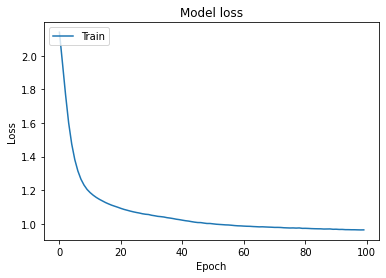

In [411]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [412]:
prediction_clf = model.predict(X_test)
prediction_clf = (prediction_clf > 0.5)
prediction_clf

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [413]:
print(classification_report(y_test, prediction_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.68      0.68      0.68       148
           6       0.63      0.36      0.46       132
           7       0.62      0.32      0.42        41
           8       0.00      0.00      0.00         3

   micro avg       0.66      0.48      0.55       340
   macro avg       0.21      0.15      0.17       340
weighted avg       0.61      0.48      0.53       340
 samples avg       0.48      0.48      0.48       340



<b>Obervation:</b>
- Have added couple of hidden layers but We couldn''t see much improvement in accuracy after optimization. 
- Loss value is more than 2 in first epoch and drastically reduced to 0.90 in 100 epoch by updating weights in backpropagation.
- Accuracy is 0.11 in first epoch and it is increased to 0.60 in 100 epoch.
- Signal_Strength 5 is having f1-score 0.68 and recall 0.68. It shows that 68% of prediction is correct for Signal strenth 5.

## Save Model

In [414]:
model.save_weights('signal_clf.h5')

In [415]:
with open('signal_classification.json', 'w') as f:
    f.write(model.to_json())

## PART 3

## Context:
Develop a clickable GUI [desk application or web service application] which can automate Part I & II of this
project.

## Pre-requisites:
#### Packages:
- ipywidgets
- IPython.display

#### Environment:
- Google Colab or Local 

Note: Execute below code and the GUI controls will be rendered. 

In [416]:
!pip install ipywidgets

## Import Libraries

In [417]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display, Markdown, clear_output
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import to_categorical

## GUI Controls

In [418]:
label_header = widgets.Label(
                  'Neural Networks GUI - Great Learning',
                  layout = Layout(width='800px',display="flex",justify_content="center"),
                  
               )
label_header.style.label_color="lightgreen"

text = widgets.Text(
       description = '',
       value = 'Enter file name with file path'
        )

text1 = widgets.Text(
       description = '',
       
       )

label_filename = widgets.Label(
                  'File Name',
                  layout = Layout(width='100px',display="flex",justify_content="flex-start")
                )

label_target = widgets.Label(
                  'Target Column',
                  layout = Layout(width='100px',display="flex",justify_content="flex-start")
                )

label = widgets.Label(
        'Neural Network Regressor',
        )

labelc = widgets.Label(
        'Neural Network Classifier',
        )


label_regressor = widgets.Label(
        'Regression',
        layout = Layout(width='100px',display="flex",justify_content="flex-end")
        )
label_regressor_pickle = widgets.Label(
        'Pickle',
        layout = Layout(width='100px',display="flex",justify_content="flex-end")
        )

label_classifier = widgets.Label(
        'Classifier',
        layout = Layout(width='100px',display="flex",justify_content="flex-end")
        )

label_classifier_pickle = widgets.Label(
        'Pickle',
        layout = Layout(width='100px',display="flex",justify_content="flex-end")
        )

text_import = widgets.Text(
        value='',
        )

text_target = widgets.Text(
        value='',
        )

text_regression_train = widgets.Text(
        value='',
        )

text_regression_pickle = widgets.Text(
        value='',
        )

text_classifier_train = widgets.Text(
        value='',
        )

text_classifier_pickle = widgets.Text(
        value='',
        )


button = widgets.Button(
        description='Import Data',
        )


button_target = widgets.Button(
        description='Import Target',
        )

button_regression_train = widgets.Button(
        description='Train',
        )

button_regression_pickle = widgets.Button(
        description='Run',
        )

button_classifier_train = widgets.Button(
        description='Train',
        )

button_classifier_pickle = widgets.Button(
        description='Run',
        )

out = widgets.Output()
out1 = widgets.Output()




## Functions

In [419]:
def on_button_clicked(_):
      # "linking function with output"
      global df
      with out:
          # what happens when we press the button
        
          df = pd.read_csv(text.value)
          clear_output()
          text_import.value="Done"
      return df 

def on_button_target_clicked(_):
      # "linking function with output"
      with out1:
          # what happens when we press the button
          if text1.value in df.columns:
              clear_output()
              text_target.value = 'Found'

def on_button_target_clicked(_):
      # "linking function with output"
      with out1:
          # what happens when we press the button
          
              clear_output()
              text_target.value = 'Found'


def on_button_regression_train_clicked(_):
    
    with out1:
        global regmodel
        X = df.drop(text1.value, axis=1)
        y = df[text1.value]
        clear_output()
        text_regression_train.value = " 20% Training Inprogress. Please wait..."
        
        X = X.astype('float32')
        y = y.astype('float32')

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
        clear_output()
        text_regression_train.value = "40% Training Inprogress. Please wait..."
        
        normal = MinMaxScaler()
        scaledXtrain = normal.fit_transform(X_train)
        scaledXtest = normal.transform(X_test)

        clear_output()
        text_regression_train.value = "60% Training Inprogress. Please wait..."

        #Initialize Sequential Graph (model)
        regmodel = tf.keras.Sequential()
        
        #Add Dense layer for prediction - Keras declares weights and bias automatically
        regmodel.add(tf.keras.layers.Dense(6, input_dim=11, kernel_initializer='normal', activation='relu'))
        regmodel.add(tf.keras.layers.Dense(1, activation='linear'))

        #Compile the model - add Loss and Gradient Descent optimizer
        regmodel.compile(optimizer=keras.optimizers.Adam(),  loss='mse', metrics=['mse'])

        clear_output()
        text_regression_train.value = "80% Training Inprogress. Please wait..."

        regmodel.fit(scaledXtrain, y_train,
                validation_data=(scaledXtest, y_test), 
               epochs=100,
                batch_size = 5
                )
        clear_output()
        text_regression_train.value = "Network Trained"
    return regmodel

def on_button_regression_pickle_clicked(_):
   with out1:
      regmodel.save_weights('signal_regressor.h5')
      clear_output()
      text_regression_pickle.value = "Saved model to disk"

def on_button_classifier_train_clicked(_):
    with out1:
        global clsmodel
        # Split independed and depended variable
        X = df.drop(text1.value, axis=1)
        y = df[text1.value]

        clear_output()
        text_classifier_train.value = "20% Training inprogress, please wait..."
        
        X = X.astype('float32')
        y = y.astype('int32')

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
        clear_output()
        text_classifier_train.value = "40% Training inprogress, please wait..."
        
        y_train = to_categorical(y_train, num_classes=9)
        y_test = to_categorical(y_test, num_classes=9, dtype='int32')

        normal = MinMaxScaler()
        X_train = normal.fit_transform(X_train)
        X_test = normal.transform(X_test)

        clear_output()
        text_classifier_train.value = "60% Training inprogress, please wait..."
        
        clsmodel = tf.keras.Sequential()

        #Add Dense layer for prediction - Keras declares weights and bias automatically
        clsmodel.add(tf.keras.layers.Dense(20, input_dim=11, activation='relu'))
        clsmodel.add(tf.keras.layers.Dense(15, input_dim=11, activation='relu'))
        clsmodel.add(tf.keras.layers.Dense(9, activation='softmax'))
        #Compile the model
        clsmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        clear_output()
        text_classifier_train.value = "80% Training inprogress, please wait..."
        
        clsmodel.fit(X_train, y_train,
                  validation_data=(X_test, y_test), 
                  epochs=100,
                  batch_size = 20
                )
        clear_output()
        text_classifier_train.value = "Network Trained"
    return clsmodel

def on_button_classifier_pickle_clicked(_):
   with out1:
      clsmodel.save_weights('signal_classifier.h5')
      clear_output()
      text_classifier_pickle.value = "Saved model to disk"


## Events

In [420]:
button.on_click(on_button_clicked)
button_target.on_click(on_button_target_clicked)
button_regression_train.on_click(on_button_regression_train_clicked)
button_regression_pickle.on_click(on_button_regression_pickle_clicked)
button_classifier_train.on_click(on_button_classifier_train_clicked)
button_classifier_pickle.on_click(on_button_classifier_pickle_clicked)

## Execution

In [421]:
box0 = widgets.HBox([label_header])
box1 = widgets.HBox([label_filename, text, button, text_import])
box2 = widgets.HBox([label_target, text1, button_target, text_target])
box3 = widgets.HBox([label]) 
box4 = widgets.HBox([label_regressor,button_regression_train, text_regression_train]) 
box5 = widgets.HBox([label_regressor_pickle,button_regression_pickle,text_regression_pickle])
box6 = widgets.HBox([labelc])
box7 = widgets.HBox([label_classifier,button_classifier_train, text_classifier_train])
box8 = widgets.HBox([label_classifier_pickle,button_classifier_pickle,text_classifier_pickle]) 
widgets.VBox([box0, box1, box2, box3, box4,box5, box6, box7, box8])

# End Project